In [1]:
!pip -q install langchain

In [2]:

!pip install tiktoken
!pip -q install datasets loralib sentencepiece
!pip -q pypdf
!pip -q install sentence_transformers

ERROR: unknown command "pypdf"


In [45]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━

In [3]:
!pip install torch

In [46]:
!mkdir docs
!pip install scikit-learn
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.3/270.3 kB 1.2 MB/s eta 0:00:00


In [38]:
import numpy as np

In [48]:
!pip install openai

In [5]:
from sklearn.cluster import KMeans

In [6]:
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import TextLoader
from langchain.document_loaders import Docx2txtLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.llms import OpenAI
from langchain import PromptTemplate,  LLMChain
from langchain.chains.summarize import load_summarize_chain
from langchain.schema import Document

from langchain.chat_models import ChatOpenAI


from langchain import HuggingFacePipeline
from langchain.chains.question_answering import load_qa_chain



In [7]:
import torch
import transformers

In [8]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline

In [9]:
 from huggingface_hub import notebook_login

In [10]:
import tiktoken

In [11]:
 import sys
 import os

In [13]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [14]:
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [16]:
document=[]
for file in os.listdir("docs"):
  if file.endswith('.pdf'):
    pdf_path = "./docs/"+file
    loader= PyPDFLoader(pdf_path)
    document.extend(loader.load())



In [21]:
del document[0]

In [22]:
document[0]

Document(page_content='hair\tand\tsmiling\tat\tJosh.\t“We’ll\thave\troom\tfor\ta\tden\tand\tmaybe\ta\trec\troom,\ntoo.\tYou’d\tlike\tthat—wouldn’t\tyou,\tAmanda?”\nI\tshrugged.\tA\tcold\tbreeze\tmade\tme\tshiver.\tIt\twas\tactually\ta\tbeautiful,\nhot\tsummer\tday.\tBut\tthe\tcloser\twe\tgot\tto\tthe\thouse,\tthe\tcolder\tI\tfelt.\nI\tguessed\tit\twas\tbecause\tof\tall\tthe\ttall,\told\ttrees.\nI\twas\twearing\twhite\ttennis\tshorts\tand\ta\tsleeveless\tblue\tT-shirt.\tIt\thad\nbeen\thot\tin\tthe\tcar.\tBut\tnow\tI\twas\tfreezing.\tMaybe\tit’ll\tbe\twarmer\tin\tthe\nhouse,\tI\tthought.\n“How\told\tare\tthey?”\tMr.\tDawes\tasked\tMom,\tstepping\tonto\tthe\tfront\nporch.\n“Amanda\tis\ttwelve,”\tMom\tanswered.\t“And\tJosh\tturned\televen\tlast\nmonth.”\n“They\tlook\tso\tmuch\talike,”\tMr.\tDawes\ttold\tMom.\nI\tcouldn’t\tdecide\tif\tthat\twas\ta\tcompliment\tor\tnot.\tI\tguess\tit’s\ttrue.\tJosh\nand\tI\tare\tboth\ttall\tand\tthin\tand\thave\tcurly\tbrown\thair\tlike\tDad’s,\tand\tdark\nb

In [23]:
for item in document:
  item.page_content = item.page_content.replace('\t', ' ')
  item.page_content = item.page_content.replace('\n', ' ')

In [24]:
len(document)

75

In [25]:
document_splitter = CharacterTextSplitter(chunk_size = 500, chunk_overlap = 0)

In [26]:
document_chunk= document_splitter.split_documents(document)

In [27]:
document_chunk[0]

Document(page_content='hair and smiling at Josh. “We’ll have room for a den and maybe a rec room, too. You’d like that—wouldn’t you, Amanda?” I shrugged. A cold breeze made me shiver. It was actually a beautiful, hot summer day. But the closer we got to the house, the colder I felt. I guessed it was because of all the tall, old trees. I was wearing white tennis shorts and a sleeveless blue T-shirt. It had been hot in the car. But now I was freezing. Maybe it’ll be warmer in the house, I thought. “How old are they?” Mr. Dawes asked Mom, stepping onto the front porch. “Amanda is twelve,” Mom answered. “And Josh turned eleven last month.” “They look so much alike,” Mr. Dawes told Mom. I couldn’t decide if that was a compliment or not. I guess it’s true. Josh and I are both tall and thin and have curly brown hair like Dad’s, and dark brown eyes. Everyone says we have “serious” faces. “I really want to go home,” Josh said, his voice cracking. “I hate this place.” My brother is the most impa

In [28]:
embeddings = HuggingFaceEmbeddings(model_name = 'sentence-transformers/all-MiniLM-L6-v2')

In [29]:
embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={})

In [30]:
vectordb = Chroma.from_documents(document_chunk, embedding= embeddings, persist_directory= './data')

In [31]:
vectordb.persist()

Performing kmeans clustering

In [33]:
textList = list(map(lambda item: item.page_content, document_chunk))

In [34]:
doc_embeddings = embeddings.embed_documents(textList)

In [35]:
num_clusters = 15
kmeans = KMeans(n_clusters= num_clusters, random_state = 42).fit(doc_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
kmeans.labels_

array([ 3, 14,  4,  1,  0,  0,  4,  4,  4,  2,  1,  1,  9,  3, 14, 14,  0,
       11,  5,  9,  5,  1,  9,  6,  9,  5,  3, 14,  9,  3,  3,  9, 14,  1,
       14,  9,  8,  4,  4, 13, 10,  9,  1,  1,  6,  7,  2,  7,  7,  2,  1,
        1,  8,  7,  7,  7,  7,  0,  8,  9,  8,  4,  4,  1,  2,  7,  4,  4,
        2,  2,  8, 12, 12,  8,  0], dtype=int32)

In [39]:
doc_embeddings_np = np.array(doc_embeddings)

In [40]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [41]:

tsne= TSNE(n_components = 2, random_state= 42)
reduced_data_tsne= tsne.fit_transform(doc_embeddings_np)

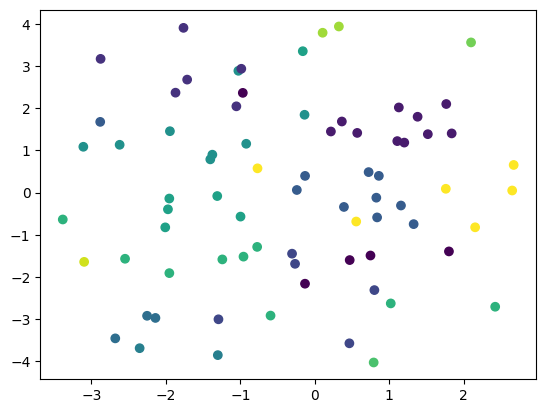

In [42]:
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)

In [43]:
closest_indices = []
for i in range(num_clusters):
  distances = np.linalg.norm(doc_embeddings_np - kmeans.cluster_centers_[i], axis = 1)
  closest_index = np.argmin(distances)
  closest_indices.append(closest_index)

In [44]:
selected_indices = sorted(closest_indices)
selected_indices

[5, 15, 17, 18, 23, 26, 31, 38, 39, 40, 47, 58, 63, 68, 71]

In [45]:
sel_docs = [document_chunk[doc] for doc in selected_indices]

In [46]:
len(sel_docs)

15

In [47]:
llmO = OpenAI(temperature=0.7, max_tokens = 512)

In [48]:
strPrompt = """You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
template = strPrompt

prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = LLMChain(prompt=prompt, llm=llmO, verbose = True)

In [49]:
#wrps output text
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [88]:
# summary_list= []
task= await llm_chain.agenerate("Kings never die")
# for i, doc in enumerate(sel_docs):
#   chunk_summary = llm_chain.run(doc)
#   summary_list.append(chunk_summary)
#   summary_list.append("###")
#   print(f" summary #{i} (chunk #{i})- summary: {chunk_summary}\t")


TypeError: ignored

In [87]:
print(await task)

TypeError: ignored

In [73]:
import time
import asyncio

summary_list = []


async def async_generate(llm_chain, doc):
    resp = await llm_chain.agenerate(doc)
    return resp.generations[0][0].text

doc = "Kings never die"
tasks = []

async def generate_concurrently():

    for _ in range(2):
        task = asyncio.create_task(async_generate(llm_chain, doc))
        tasks.append(task)
    await asyncio.gather(*tasks)
    return tasks



# If running this outside of Jupyter, use asyncio.run(generate_concurrently())
tasks = await generate_concurrently()

for task in tasks:
    summary_list.append(task.result())



TypeError: ignored

In [72]:
summary_list

['\n\nNo, kings do not die. They may be overthrown or deposed, but they remain kings in title even if they are no longer exercising power.',
 '\n\nThe phrase "kings never die" is generally used to refer to the immortal, legacy nature of great leaders, rulers, and monarchs. It implies that while their physical body may perish, their life, accomplishments, and reputation will be remembered forever. It also suggests the continuity of power, as the lessons of great rulers and leaders are often studied and passed down within their respective lineages.']

In [70]:
import time
import asyncio

summary_list = []
tasks = []

async def async_generate(llm_chain, doc):
    resp = await llm_chain.agenerate(str(doc))
    return resp.generations[0][0].text



async def generate_concurrently():
  for i, doc in enumerate(sel_docs):
      task = asyncio.create_task(async_generate(llm_chain, doc.page_content))
      tasks.append(task)
      await asyncio.gather(*tasks)
  return tasks


# If running this outside of Jupyter, use asyncio.run(generate_concurrently())
tasks = await generate_concurrently()

for i,task in enumerate(tasks):
  summary_list.append("###")
  print(f" summary #{i} (chunk #{i})- summary: {task}\t")
  summary_list.append(task.result())

TypeError: ignored

In [66]:
import time
import asyncio

summary_list = []
tasks = []

async def async_generate(llm_chain, doc):
    resp = await llm_chain.agenerate(doc)
    return resp.generations[0][0].text



async def generate_concurrently():
  for i, doc in enumerate(sel_docs):
      task = asyncio.create_task(async_generate(llm_chain, doc.page_content))
      tasks.append(task)
      await asyncio.gather(*tasks)
  return tasks


# If running this outside of Jupyter, use asyncio.run(generate_concurrently())
tasks = await generate_concurrently()

for i,task in enumerate(tasks):
  summary_list.append("###")
  print(f" summary #{i} (chunk #{i})- summary: {task.result()}\t")
  summary_list.append(task.result())


TypeError: ignored

In [67]:
import time
import asyncio

summary_list = []
tasks = []

async def async_generate(llm_chain, doc):
    resp = await llm_chain.agenerate(doc)
    return resp.generations[0][0].text



async def generate_concurrently():
  for i, doc in enumerate(sel_docs):
      task = asyncio.create_task(async_generate(llm_chain, doc.page_content))
      tasks.append(task)
  await asyncio.gather(*tasks)
  return tasks


# If running this outside of Jupyter, use asyncio.run(generate_concurrently())
tasks = await generate_concurrently()

for i, task in enumerate(tasks):
    summary_list.append("###")
    print(f" summary #{i} (chunk #{i})- summary: {task.result()}")
    summary_list.append(task.result())


TypeError: ignored

In [ ]:
main_summary = " ".join(summary_list)
main_summary = main_summary.replace('\t', ' ')

In [ ]:
main_summary

In [ ]:
def createSummary(texts):

    #splits str into chunks
    def splitText(texts):
        loader= RecursiveCharacterTextSplitter(chunk_size= 5000, chunk_overlap = 10)
        texts = loader.split_text(texts)
        return texts

    def num_tokens_from_string(string: str, encoding_name="gpt-3.5-turbo") -> int:
        encoding = tiktoken.encoding_for_model(encoding_name)
        num_tokens = len(encoding.encode(string))
        return num_tokens

    #returns total no. of tokens in a list of strings
    def checkLength(blocks):
        # print("#########length########")
        return num_tokens_from_string("\n".join(blocks))

    #creates running summary using context and new chunk of text
    def createRunningSumary(item):
        temp = openai.ChatCompletion.create(
            model = "gpt-3.5-turbo",
            messages = [{"role":"system",
                            "content": f"""You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
                        Your goal is to give a verbose summary of what happened in the story.
                        The reader should be able to grasp what happened in the book.

                        ```{item}```
                        VERBOSE SUMMARY:
                        """}],
            temperature = 0.7,
            max_tokens= 3000
        )
        return temp['choices'][0]['message']['content']

    def helper(blocks):
        once = True # a bool to make sure loop runs atleast one times

        while once:

            blocks = " ".join(blocks)
            blocks = splitText(blocks)


            for index,item in enumerate(blocks):
                    print(f"""######entered for {index} ######""")
                    print(f""" #######token in item {index} is {num_tokens_from_string(item)}""")
                    blocks[index]=createRunningSumary(item)
                    print(f"""tokens in current block after {index} item: {checkLength(blocks)}""")
                    print(" updated blocks")
            print("#######exited for########")
            print(f"""#######Length of summaries after for: {checkLength(blocks)}######""")
            once =False

        print("exit while")
        return blocks

    #creating variables
    chunks= splitText(texts)
    blocks = helper(chunks)
    result = " ".join(blocks)

    return result

In [ ]:
output= createSummary(main_summary)